# Métodos Basados en Densidad - RESUELTOS



---
Este cuaderno contiene ejercicios prácticos para consolidar los conceptos del Módulo 4.

## Configuración Inicial

Ejecuta esta celda antes de comenzar los ejercicios.

In [ ]:
# Instalación de HDBSCAN
!pip install hdbscan -q

In [ ]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import confusion_matrix

# HDBSCAN
import hdbscan

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Configuración completada.")

Configuración completada.


---

## Ejercicio 1: Comprensión de los Conceptos de DBSCAN

### Contexto

Para comprender DBSCAN es fundamental entender los conceptos de epsilon-vecindad y la clasificación de puntos en núcleo, borde y ruido.

### Datos

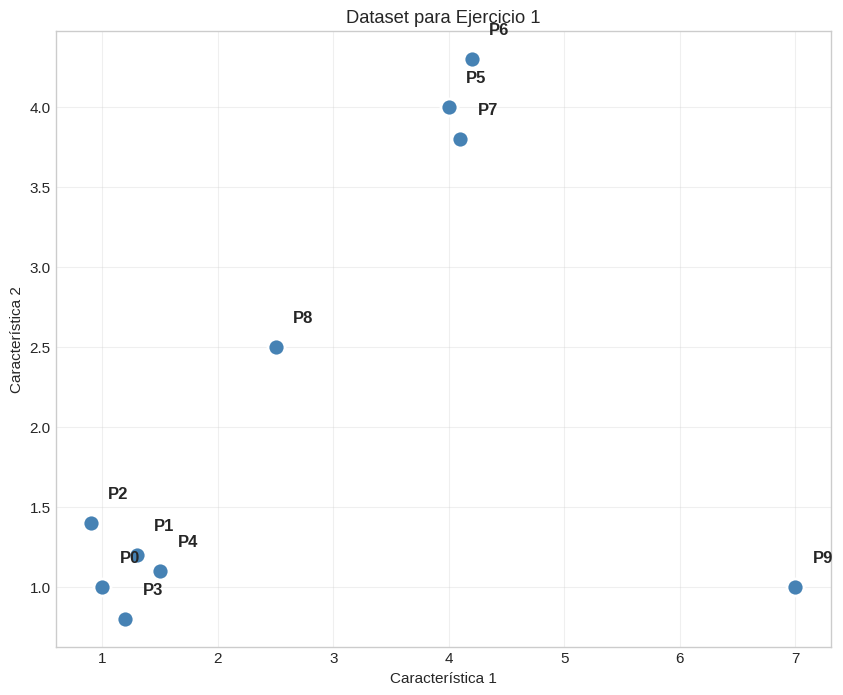

In [ ]:
# Dataset pequeño para análisis manual
X_ej1 = np.array([
    [1.0, 1.0],   # P0
    [1.3, 1.2],   # P1
    [0.9, 1.4],   # P2
    [1.2, 0.8],   # P3
    [1.5, 1.1],   # P4
    [4.0, 4.0],   # P5
    [4.2, 4.3],   # P6
    [4.1, 3.8],   # P7
    [2.5, 2.5],   # P8 - punto intermedio
    [7.0, 1.0]    # P9 - outlier
])

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_ej1[:, 0], X_ej1[:, 1], c='steelblue', s=150, edgecolors='w', linewidths=2)
for i, (x, y) in enumerate(X_ej1):
    plt.annotate(f'P{i}', (x + 0.15, y + 0.15), fontsize=12, fontweight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 1')
plt.grid(True, alpha=0.3)
plt.show()

### Tarea 1.1: Cálculo de Vecindades

Dado eps=0.6 y min_samples=3, calcule la epsilon-vecindad de cada punto y determine cuántos vecinos tiene cada uno.

In [ ]:
# Parámetros
eps = 0.6
min_samples = 3

# TODO: Calcular las vecindades usando NearestNeighbors
# Use radius_neighbors con el radio eps

# Su código aquí
nn = NearestNeighbors(radius=eps)  # Reemplazar
nn.fit(X_ej1)
vecindades = nn.radius_neighbors(X_ej1, return_distance=False)  # Reemplazar

# Mostrar el número de vecinos de cada punto
if vecindades is not None:
    print(f"Epsilon-vecindades (eps={eps}):")
    print("-" * 40)
    for i, vecinos in enumerate(vecindades):
        print(f"P{i}: {len(vecinos)} vecinos -> {list(vecinos)}")

Epsilon-vecindades (eps=0.6):
----------------------------------------
P0: 5 vecinos -> [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
P1: 5 vecinos -> [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
P2: 3 vecinos -> [np.int64(0), np.int64(1), np.int64(2)]
P3: 4 vecinos -> [np.int64(0), np.int64(1), np.int64(3), np.int64(4)]
P4: 4 vecinos -> [np.int64(0), np.int64(1), np.int64(3), np.int64(4)]
P5: 3 vecinos -> [np.int64(5), np.int64(6), np.int64(7)]
P6: 3 vecinos -> [np.int64(5), np.int64(6), np.int64(7)]
P7: 3 vecinos -> [np.int64(5), np.int64(6), np.int64(7)]
P8: 1 vecinos -> [np.int64(8)]
P9: 1 vecinos -> [np.int64(9)]


### Tarea 1.2: Clasificación de Puntos

Clasifique cada punto como núcleo, borde o ruido según los criterios de DBSCAN.

In [ ]:
# TODO: Clasificar cada punto
# Punto núcleo: |N_eps(p)| >= min_samples
# Punto borde: no es núcleo pero está en la vecindad de un núcleo
# Ruido: no es núcleo ni está en la vecindad de ningún núcleo

n_vecinos = [len(v) for v in vecindades]
# Identificar puntos núcleo
puntos_nucleo = set(i for i, n in enumerate(n_vecinos) if n >= min_samples)

tipos = []  # Lista para almacenar el tipo de cada punto

# Su código aquí
for i in range(len(X_ej1)):
    if i in puntos_nucleo:
        tipos.append('Núcleo')
    else:
        # Verificar si está en la vecindad de algún punto núcleo
        es_borde = False
        for nucleo in puntos_nucleo:
            if i in vecindades[nucleo]:
                es_borde = True
                break
        tipos.append('Borde' if es_borde else 'Ruido')


# Mostrar clasificación
if len(tipos) > 0:
    print("Clasificación de puntos:")
    print("-" * 40)
    for i, tipo in enumerate(tipos):
        print(f"P{i}: {tipo}")

Clasificación de puntos:
----------------------------------------
P0: Núcleo
P1: Núcleo
P2: Núcleo
P3: Núcleo
P4: Núcleo
P5: Núcleo
P6: Núcleo
P7: Núcleo
P8: Ruido
P9: Ruido


### Tarea 1.3: Verificación con DBSCAN de Scikit-learn

Aplique DBSCAN y compare los resultados con su clasificación manual.

In [ ]:
# TODO: Aplicar DBSCAN y analizar los resultados
# Compare las etiquetas asignadas con su clasificación manual

# Su código aquí
dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Reemplazar
labels = dbscan.fit_predict(X_ej1)  # Reemplazar

if labels is not None:
    print("Resultados de DBSCAN:")
    print("-" * 40)
    for i, label in enumerate(labels):
        estado = "Ruido" if label == -1 else f"Cluster {label}"
        print(f"P{i}: {estado}")

    # Identificar puntos núcleo
    print(f"\nÍndices de puntos núcleo: {dbscan.core_sample_indices_}")

Resultados de DBSCAN:
----------------------------------------
P0: Cluster 0
P1: Cluster 0
P2: Cluster 0
P3: Cluster 0
P4: Cluster 0
P5: Cluster 1
P6: Cluster 1
P7: Cluster 1
P8: Ruido
P9: Ruido

Índices de puntos núcleo: [0 1 2 3 4 5 6 7]


### Pregunta de Reflexión 1

Analice los resultados:

1. ¿Cuántos clusters se formaron? ¿Coincide con lo que observa visualmente?
2. ¿El punto P8 (intermedio) fue clasificado como núcleo, borde o ruido? ¿Por qué?
3. ¿Qué pasaría si aumentamos eps a 1.0? ¿Y si lo reducimos a 0.4?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 2: Selección de Parámetros con k-Distance Graph

### Contexto

El método del k-distance graph es fundamental para seleccionar un valor apropiado de eps. En este ejercicio, aplicará esta técnica a diferentes datasets.

### Datos

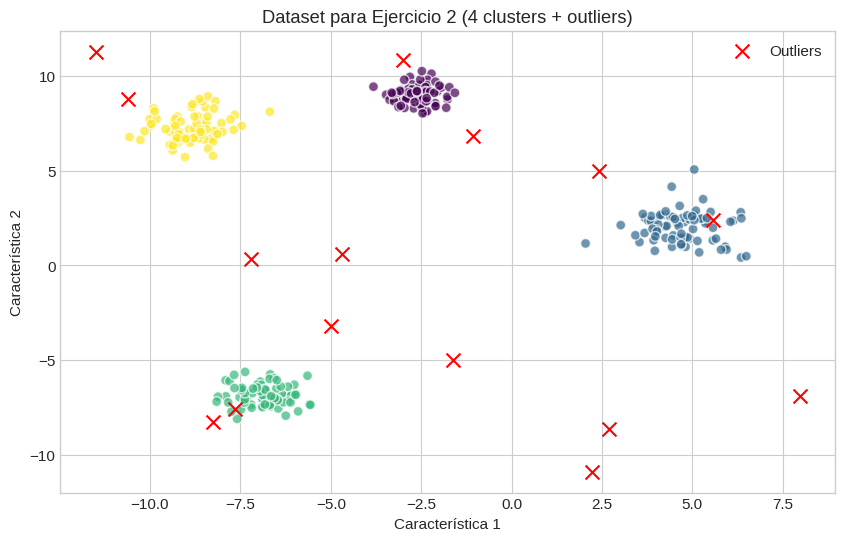

In [ ]:
# Generar dataset con estructura clara
X_ej2, y_ej2 = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=[0.5, 0.8, 0.6, 0.7],
    random_state=RANDOM_STATE
)

# Añadir algunos outliers
outliers = np.random.uniform(low=-12, high=12, size=(15, 2))
X_ej2_noisy = np.vstack([X_ej2, outliers])
y_ej2_noisy = np.hstack([y_ej2, [-1]*15])

plt.figure(figsize=(10, 6))
plt.scatter(X_ej2_noisy[:300, 0], X_ej2_noisy[:300, 1], c=y_ej2, cmap='viridis',
            edgecolors='w', s=50, alpha=0.7)
plt.scatter(X_ej2_noisy[300:, 0], X_ej2_noisy[300:, 1], c='red', marker='x',
            s=100, label='Outliers')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 2 (4 clusters + outliers)')
plt.legend()
plt.show()

### Tarea 2.1: Implementar la Función k-Distance

Implemente una función que calcule y grafique las k-distancias ordenadas.

In [ ]:
def calcular_k_distance(X, k):
    """
    Calcula la distancia al k-ésimo vecino más cercano para cada punto.

    Parámetros:
    -----------
    X : array-like de forma (n_samples, n_features)
        Datos de entrada.
    k : int
        Número de vecinos a considerar.

    Retorna:
    --------
    k_distances : array de forma (n_samples,)
        Distancias al k-ésimo vecino, ordenadas de menor a mayor.
    """
    # TODO: Implementar la función
    # 1. Crear un objeto NearestNeighbors con n_neighbors=k
    # 2. Ajustar a los datos X
    # 3. Obtener las distancias con kneighbors
    # 4. Extraer la distancia al k-ésimo vecino (última columna)
    # 5. Ordenar de menor a mayor

    # Su código aquí
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    k_distances = np.sort(distances[:, k-1])

    return k_distances

# Verificar la función
k = 5
k_dist = calcular_k_distance(X_ej2_noisy, k)
if k_dist is not None:
    print(f"k-distances calculadas: {len(k_dist)} valores")
    print(f"Rango: [{k_dist.min():.3f}, {k_dist.max():.3f}]")

k-distances calculadas: 315 valores
Rango: [0.093, 8.543]


### Tarea 2.2: Graficar k-Distance y Encontrar el Codo

Genere el gráfico de k-distancias e identifique el punto de inflexión (codo).

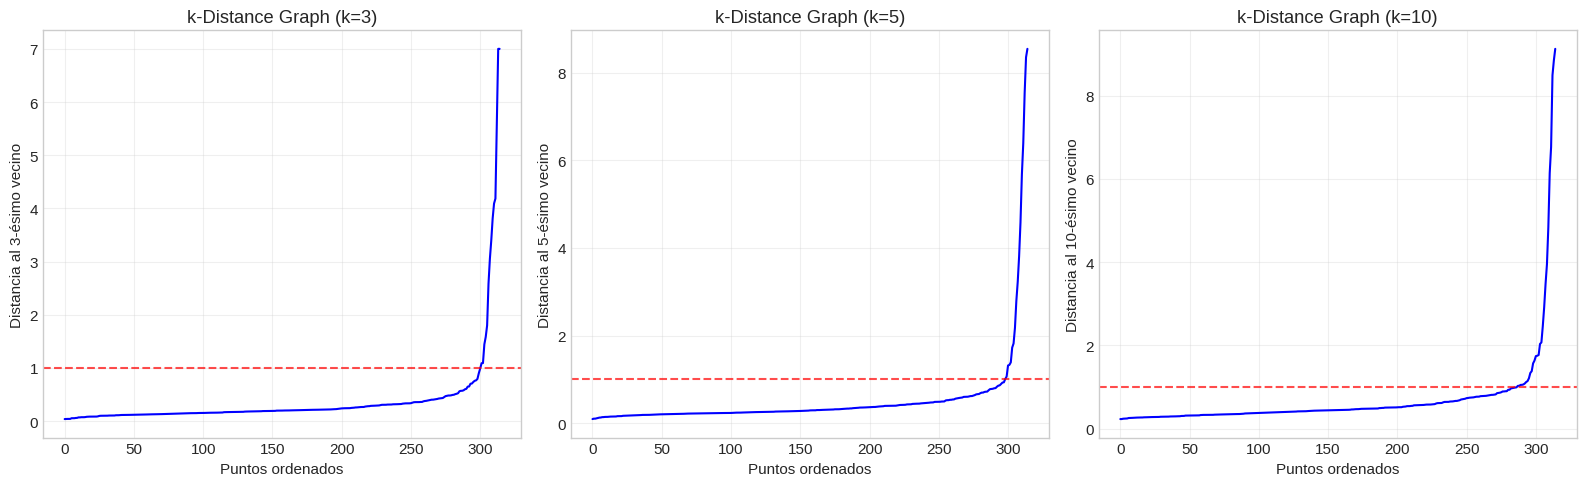

In [ ]:
# TODO: Graficar k-distance para diferentes valores de k
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

k_values = [3, 5, 10]

for idx, k in enumerate(k_values):
    ax = axes[idx]

    # TODO: Calcular k-distances y graficar
    k_dist = calcular_k_distance(X_ej2_noisy, k)
    ax.plot(range(len(k_dist)), k_dist, 'b-', linewidth=1.5)
    ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='eps sugerido: 1.0')

    ax.set_xlabel('Puntos ordenados')
    ax.set_ylabel(f'Distancia al {k}-ésimo vecino')
    ax.set_title(f'k-Distance Graph (k={k})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Tarea 2.3: Aplicar DBSCAN con el eps Seleccionado

Use el valor de eps identificado en el gráfico anterior.

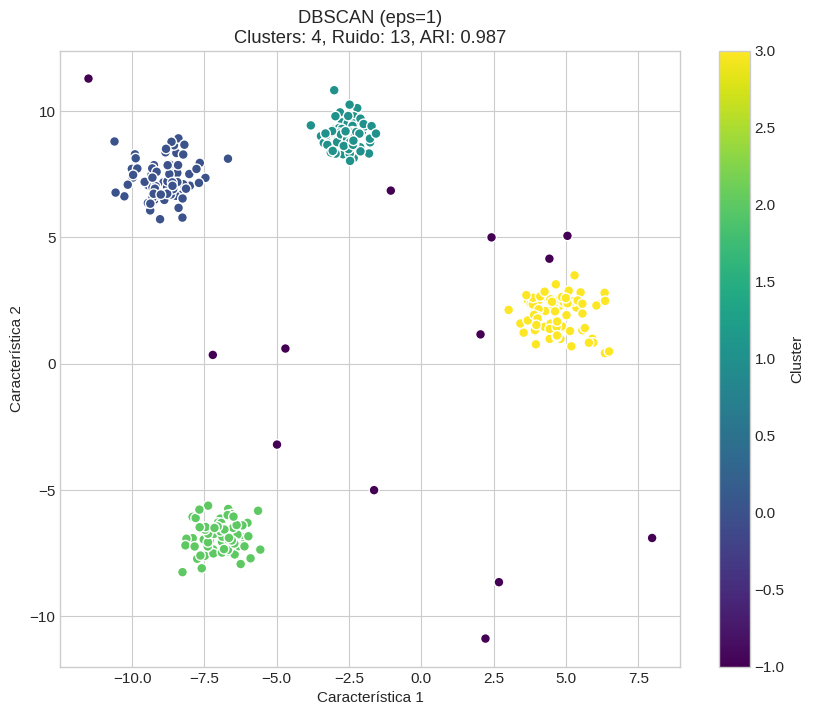

In [ ]:
# TODO: Aplicar DBSCAN con el eps identificado
# Pruebe con el valor del codo que identificó

eps_optimo = 1  # Reemplazar con su valor
min_samples = 5

if eps_optimo is not None:
  # Su código aquí
  dbscan_ej2 = DBSCAN(eps=eps_optimo, min_samples=min_samples)
  labels_ej2 = dbscan_ej2.fit_predict(X_ej2_noisy)

  n_clusters = len(set(labels_ej2)) - (1 if -1 in labels_ej2 else 0)
  n_ruido = (labels_ej2 == -1).sum()

  # Calcular ARI (excluyendo ruido añadido)
  mask = y_ej2_noisy >= 0
  ari = adjusted_rand_score(y_ej2_noisy[mask], labels_ej2[mask])

  # Visualizar resultados
  plt.figure(figsize=(10, 8))
  scatter = plt.scatter(X_ej2_noisy[:, 0], X_ej2_noisy[:, 1], c=labels_ej2,
                        cmap='viridis', edgecolors='w', s=50)
  plt.colorbar(scatter, label='Cluster')
  plt.xlabel('Característica 1')
  plt.ylabel('Característica 2')
  plt.title(f'DBSCAN (eps={eps_optimo})\nClusters: {n_clusters}, Ruido: {n_ruido}, ARI: {ari:.3f}')
  plt.show()

### Pregunta de Reflexión 2

Analice el proceso de selección de parámetros:

1. ¿El valor de eps identificado permitió detectar correctamente los 4 clusters?
2. ¿Cuántos outliers fueron detectados? ¿Coincide con los 15 que añadimos?
3. ¿Cómo afecta el valor de k a la forma de la curva y al eps sugerido?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 3: Comparación de Algoritmos en Estructuras No Convexas

### Contexto

Una ventaja clave de los métodos basados en densidad es su capacidad para detectar clusters de forma arbitraria. Compare el rendimiento de K-Means, DBSCAN y HDBSCAN.

### Datos

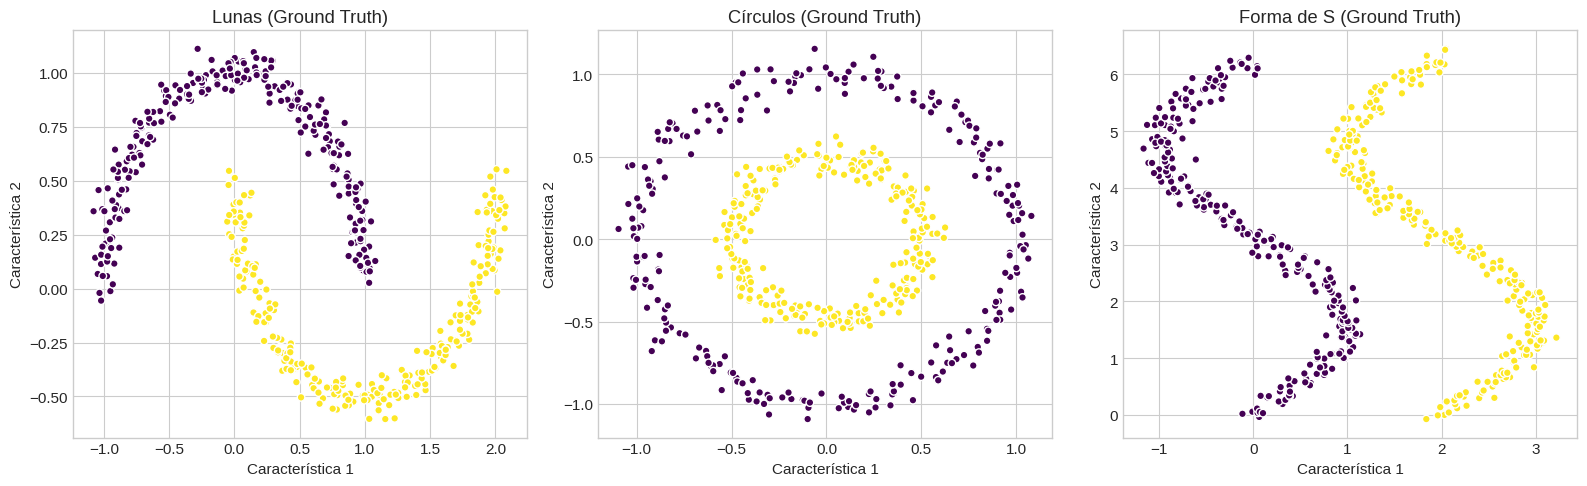

In [ ]:
# Generar datasets con diferentes estructuras
n_samples = 500

# Dataset 1: Lunas
X_lunas, y_lunas = make_moons(n_samples=n_samples, noise=0.05, random_state=RANDOM_STATE)

# Dataset 2: Círculos concéntricos
X_circulos, y_circulos = make_circles(n_samples=n_samples, noise=0.05, factor=0.5,
                                       random_state=RANDOM_STATE)

# Dataset 3: Forma de S con ruido
t = np.linspace(0, 2*np.pi, n_samples//2)
x1 = np.sin(t) + np.random.normal(0, 0.1, len(t))
y1 = t + np.random.normal(0, 0.1, len(t))
x2 = np.sin(t) + 2 + np.random.normal(0, 0.1, len(t))
y2 = t + np.random.normal(0, 0.1, len(t))
X_s = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
y_s = np.array([0]*len(t) + [1]*len(t))

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
datasets = [(X_lunas, y_lunas, 'Lunas'), (X_circulos, y_circulos, 'Círculos'),
            (X_s, y_s, 'Forma de S')]

for ax, (X, y, titulo) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='w', s=30)
    ax.set_title(f'{titulo} (Ground Truth)')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

### Tarea 3.1: Aplicar K-Means a Cada Dataset

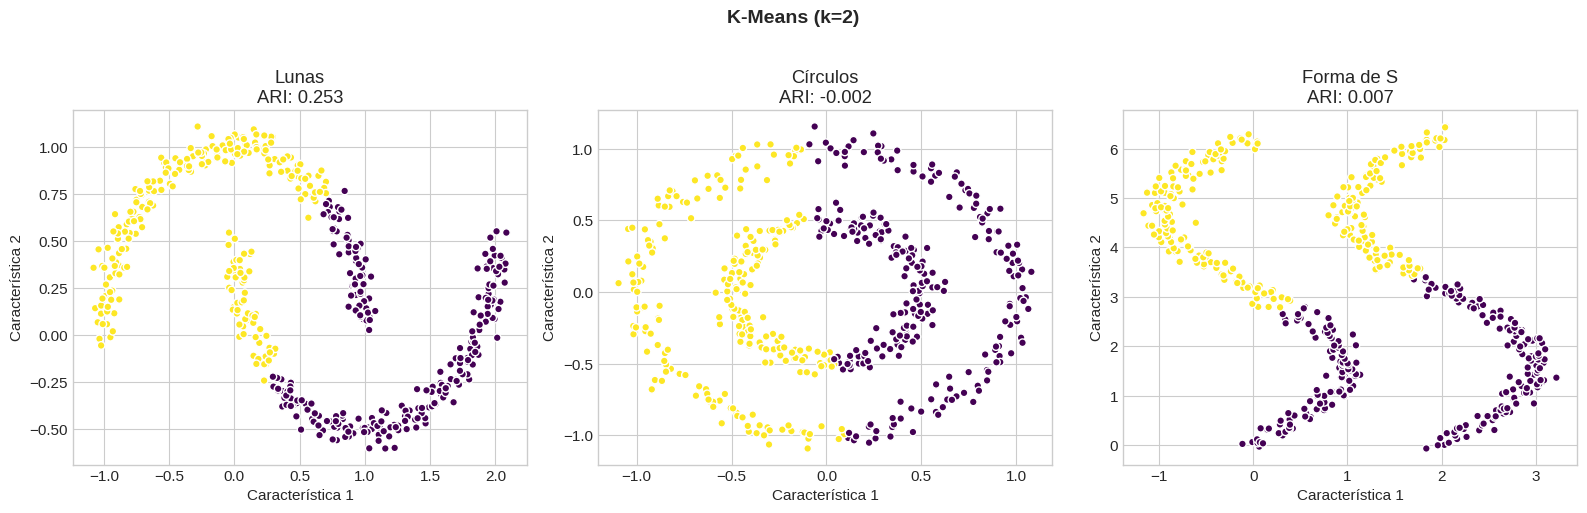

In [ ]:
# TODO: Aplicar K-Means (k=2) a cada dataset y calcular ARI
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

resultados_kmeans = []

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]

    # TODO: Aplicar K-Means
    # Su código aquí
    kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
    labels_km = kmeans.fit_predict(X)
    ari_km = adjusted_rand_score(y_true, labels_km)
    resultados_kmeans.append(ari_km)

    ax.scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis', edgecolors='w', s=30)
    ax.set_title(f'{titulo}\nARI: {ari_km:.3f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('K-Means (k=2)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 3.2: Aplicar DBSCAN con Parámetros Apropiados

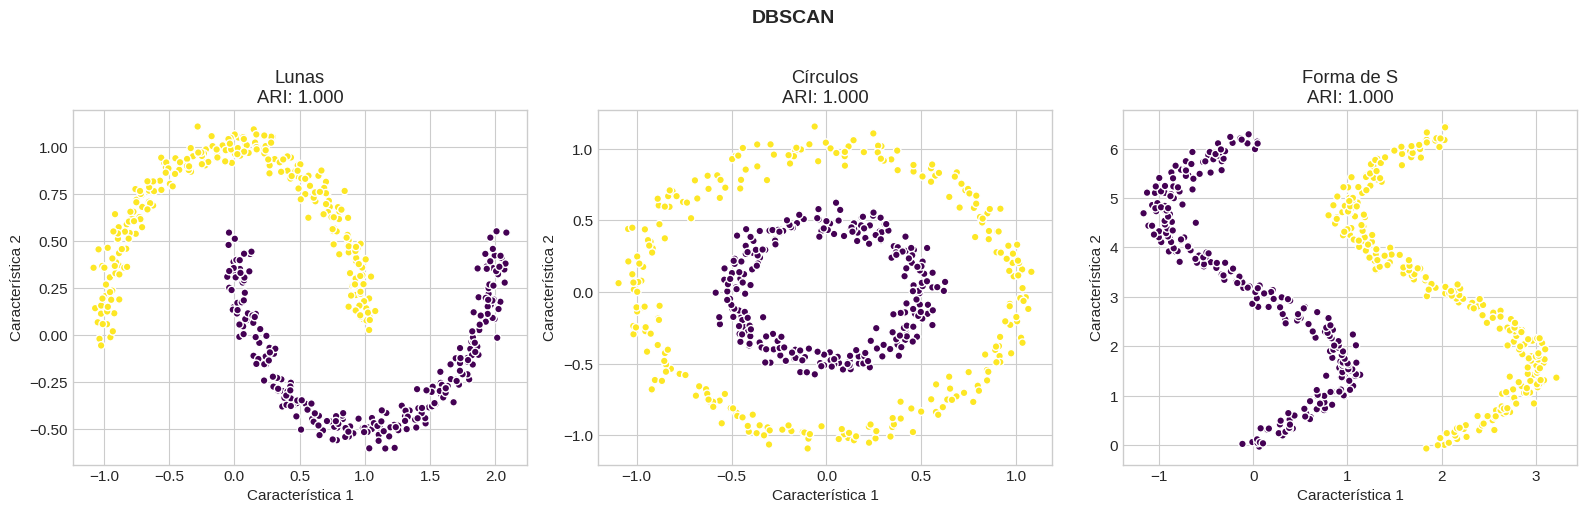

In [ ]:
# TODO: Aplicar DBSCAN a cada dataset
# Seleccione eps apropiado para cada uno (puede usar k-distance)

# Parámetros sugeridos para explorar:
# Lunas: eps entre 0.1 y 0.3
# Círculos: eps entre 0.1 y 0.3
# Forma S: eps entre 0.2 y 0.5

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# TODO: Definir parámetros para cada dataset
params_dbscan = [
    {'eps': 0.2, 'min_samples': 5},  # Lunas - Reemplazar eps
    {'eps': 0.2, 'min_samples': 5},  # Círculos - Reemplazar eps
    {'eps': 0.3, 'min_samples': 5}   # Forma S - Reemplazar eps
]

resultados_dbscan = []

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]

    # TODO: Aplicar DBSCAN con los parámetros definidos
    # Su código aquí
    dbscan = DBSCAN(**params_dbscan[idx])
    labels_db = dbscan.fit_predict(X)
    mask = labels_db >= 0
    ari_db = adjusted_rand_score(y_true[mask], labels_db[mask]) if mask.sum() > 0 else 0
    resultados_dbscan.append(ari_db)

    ax.scatter(X[:, 0], X[:, 1], c=labels_db, cmap='viridis', edgecolors='w', s=30)
    ax.set_title(f'{titulo}\nARI: {ari_db:.3f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('DBSCAN', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 3.3: Aplicar HDBSCAN

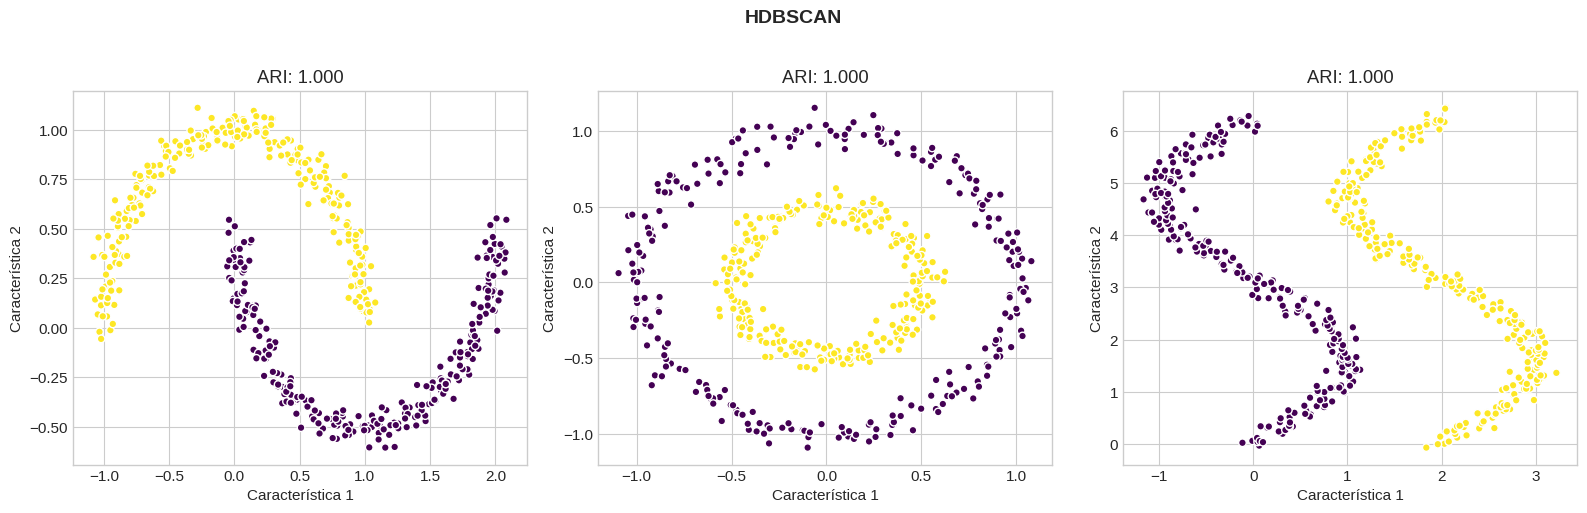

In [ ]:
# TODO: Aplicar HDBSCAN a cada dataset
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

resultados_hdbscan = []

for idx, (X, y_true, titulo) in enumerate(datasets):
    ax = axes[idx]

    # TODO: Aplicar HDBSCAN con min_cluster_size=15
    # Su código aquí
    hdb = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5)
    labels_hdb = hdb.fit_predict(X)
    mask = labels_hdb >= 0
    ari_hdb = adjusted_rand_score(y_true[mask], labels_hdb[mask]) if mask.sum() > 0 else 0
    resultados_hdbscan.append(ari_hdb)

    ax.scatter(X[:, 0], X[:, 1], c=labels_hdb, cmap='viridis', edgecolors='w', s=30)
    ax.set_title(f'ARI: {ari_hdb:.3f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('HDBSCAN', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 3.4: Tabla Comparativa de Resultados

In [ ]:
# TODO: Crear una tabla comparativa con los ARI de cada algoritmo

# Su código aquí para generar la tabla
# Formato sugerido:
# Dataset     | K-Means | DBSCAN | HDBSCAN
# Lunas       |   xxx   |  xxx   |   xxx
# Círculos    |   xxx   |  xxx   |   xxx
# Forma S     |   xxx   |  xxx   |   xxx
print("\nTabla comparativa de ARI:")
print("=" * 55)
print(f"{'Dataset':<15} {'K-Means':>12} {'DBSCAN':>12} {'HDBSCAN':>12}")
print("-" * 55)
nombres = ['Lunas', 'Círculos', 'Forma S']
for i, nombre in enumerate(nombres):
    print(f"{nombre:<15} {resultados_kmeans[i]:>12.3f} {resultados_dbscan[i]:>12.3f} {resultados_hdbscan[i]:>12.3f}")


Tabla comparativa de ARI:
Dataset              K-Means       DBSCAN      HDBSCAN
-------------------------------------------------------
Lunas                  0.253        1.000        1.000
Círculos              -0.002        1.000        1.000
Forma S                0.007        1.000        1.000


### Pregunta de Reflexión 3

Basándose en los resultados:

1. ¿Qué algoritmo tuvo mejor rendimiento general? ¿Por qué?
2. ¿En qué dataset K-Means tuvo peor rendimiento? Explique la razón.
3. ¿HDBSCAN requirió ajuste de parámetros? ¿Es esto una ventaja o desventaja?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 4: HDBSCAN - Características Avanzadas

### Contexto

HDBSCAN proporciona información adicional como probabilidades de pertenencia y outlier scores. Explore estas características.

### Datos

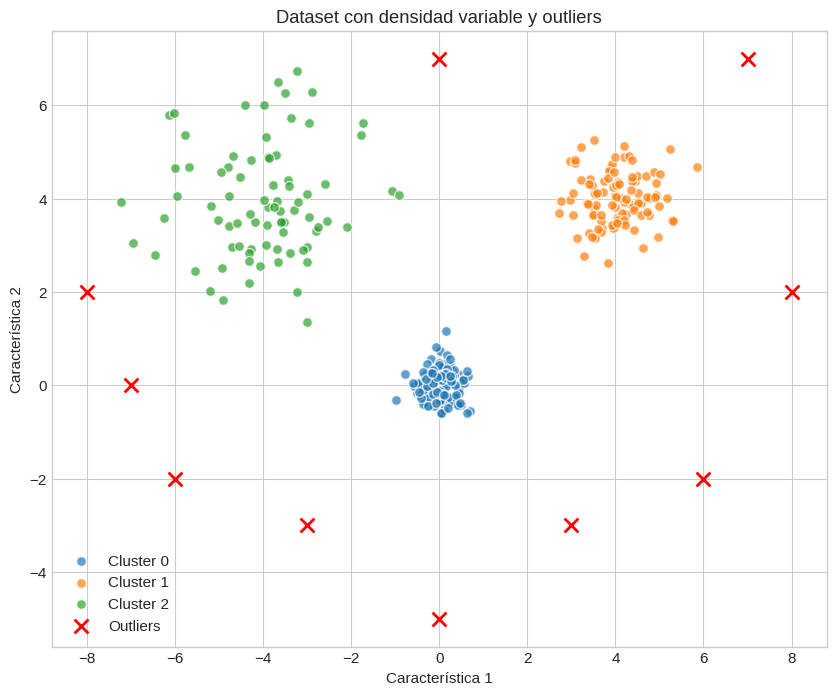

In [ ]:
# Dataset con clusters de diferente densidad y outliers
np.random.seed(RANDOM_STATE)

# Cluster denso
cluster_denso = np.random.randn(150, 2) * 0.3 + np.array([0, 0])

# Cluster medio
cluster_medio = np.random.randn(100, 2) * 0.6 + np.array([4, 4])

# Cluster disperso
cluster_disperso = np.random.randn(80, 2) * 1.2 + np.array([-4, 4])

# Outliers
outliers = np.array([
    [6, -2], [-6, -2], [0, 7], [7, 7], [-7, 0],
    [3, -3], [-3, -3], [8, 2], [-8, 2], [0, -5]
])

X_ej4 = np.vstack([cluster_denso, cluster_medio, cluster_disperso, outliers])
y_ej4 = np.array([0]*150 + [1]*100 + [2]*80 + [-1]*10)

plt.figure(figsize=(10, 8))
for label in [0, 1, 2]:
    mask = y_ej4 == label
    plt.scatter(X_ej4[mask, 0], X_ej4[mask, 1], label=f'Cluster {label}',
                edgecolors='w', s=50, alpha=0.7)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100,
            label='Outliers', linewidths=2)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset con densidad variable y outliers')
plt.legend()
plt.show()

### Tarea 4.1: Aplicar HDBSCAN y Extraer Probabilidades

In [ ]:
# TODO: Aplicar HDBSCAN y extraer probabilidades y outlier scores

# Su código aquí
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
labels_hdb = clusterer.fit_predict(X_ej4)
probabilidades = clusterer.probabilities_# Reemplazar (clusterer.probabilities_)
outlier_scores = clusterer.outlier_scores_  # Reemplazar (clusterer.outlier_scores_)

if labels_hdb is not None:
    n_clusters = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
    n_ruido = (labels_hdb == -1).sum()
    print(f"Clusters encontrados: {n_clusters}")
    print(f"Puntos de ruido: {n_ruido}")

Clusters encontrados: 3
Puntos de ruido: 7


### Tarea 4.2: Visualizar Probabilidades de Pertenencia

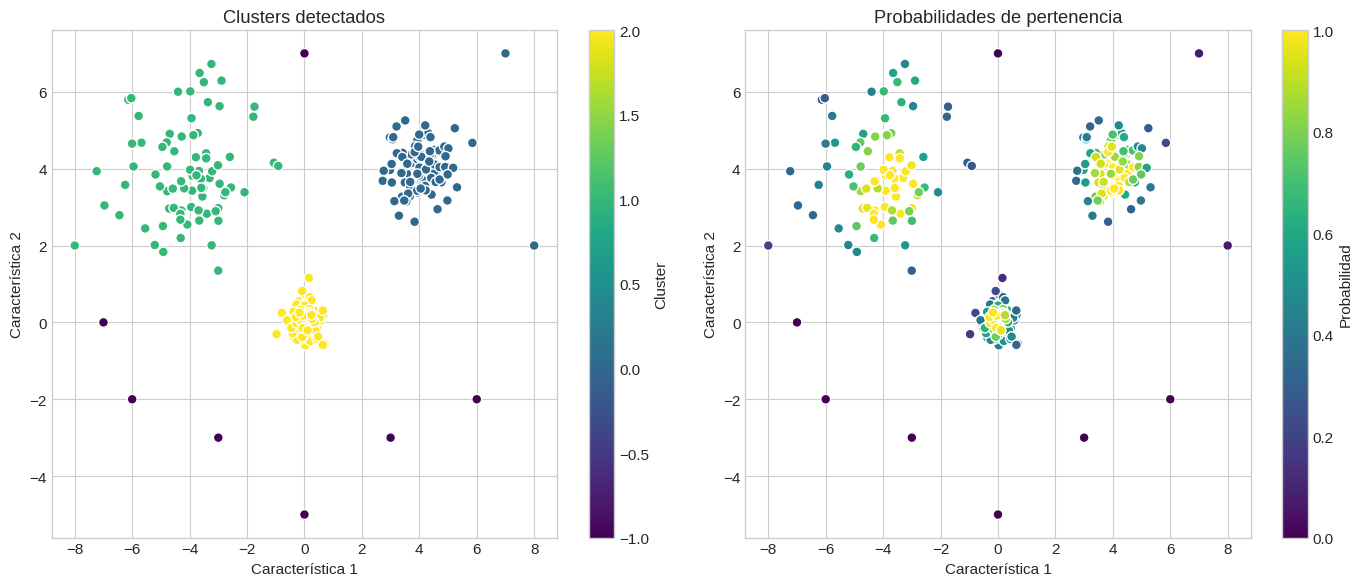

In [ ]:
# TODO: Crear visualización de probabilidades
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Clusters coloreados
ax = axes[0]
scatter = ax.scatter(X_ej4[:, 0], X_ej4[:, 1], c=labels_hdb, cmap='viridis',
                     edgecolors='w', s=50)
ax.set_title('Clusters detectados')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
plt.colorbar(scatter, ax=ax, label='Cluster')

# Subplot 2: Probabilidades de pertenencia
ax = axes[1]
scatter = ax.scatter(X_ej4[:, 0], X_ej4[:, 1], c=probabilidades, cmap='viridis',
                     edgecolors='w', s=50)
ax.set_title('Probabilidades de pertenencia')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
plt.colorbar(scatter, ax=ax, label='Probabilidad')

plt.tight_layout()
plt.show()

### Tarea 4.3: Análisis de Outlier Scores

  Punto 337: score=0.935, outlier real: True
  Punto 333: score=0.933, outlier real: True
  Punto 104: score=0.870, outlier real: False
  Punto 131: score=0.835, outlier real: False
  Punto 338: score=0.800, outlier real: True
  Punto 37: score=0.781, outlier real: False
  Punto 239: score=0.773, outlier real: False
  Punto 89: score=0.770, outlier real: False
  Punto 327: score=0.729, outlier real: False
  Punto 304: score=0.722, outlier real: False
  Punto 210: score=0.716, outlier real: False
  Punto 315: score=0.711, outlier real: False
  Punto 110: score=0.709, outlier real: False
  Punto 307: score=0.707, outlier real: False
  Punto 311: score=0.707, outlier real: False


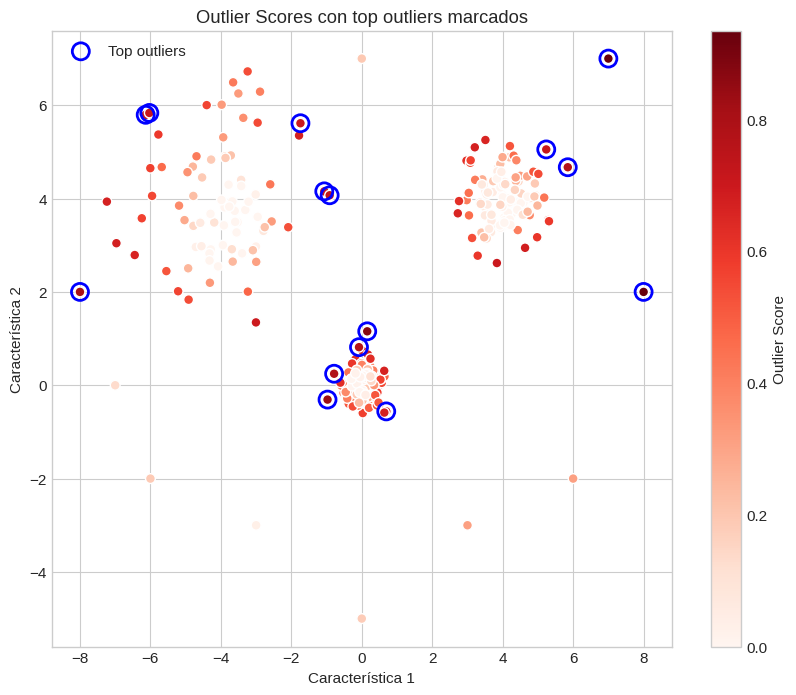

In [ ]:
# TODO: Identificar los puntos con mayor outlier score
# Compare con los outliers reales

if outlier_scores is not None:
    # TODO: Encontrar los 10 puntos con mayor outlier score
    top_outliers_idx = np.argsort(outlier_scores)[-15:][::-1]
    for idx in top_outliers_idx:
      es_outlier_real = idx >= len(X_ej4) - 10 # Los últimos 10 del dataset son outliers
      print(f"  Punto {idx}: score={outlier_scores[idx]:.3f}, outlier real: {es_outlier_real}")



# Visualizar
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_ej4[:, 0], X_ej4[:, 1], c=outlier_scores, cmap='Reds',
                     edgecolors='w', s=50)
ax.scatter(X_ej4[top_outliers_idx, 0], X_ej4[top_outliers_idx, 1],
           facecolors='none', edgecolors='blue', s=150, linewidths=2, label='Top outliers')
plt.colorbar(scatter, label='Outlier Score')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Outlier Scores con top outliers marcados')
ax.legend()
plt.show()



### Pregunta de Reflexión 4

Analice las características de HDBSCAN:

1. ¿Las probabilidades de pertenencia son más bajas en los bordes de los clusters? ¿Por qué?
2. ¿HDBSCAN detectó correctamente los 10 outliers? ¿Hubo falsos positivos o negativos?
3. ¿Cómo podría usar los outlier scores en una aplicación de detección de fraude?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 5: Caso Práctico - Segmentación de Clientes

### Contexto

Aplique métodos basados en densidad a un problema de segmentación de clientes usando datos de comportamiento de compra.

### Datos

In [ ]:
# Simular datos de clientes
np.random.seed(RANDOM_STATE)

n_clientes = 400

# Segmento 1: Clientes frecuentes de bajo gasto
seg1_frecuencia = np.random.normal(25, 3, 100)  # Visitas/mes
seg1_gasto = np.random.normal(50, 10, 100)       # Gasto promedio

# Segmento 2: Clientes ocasionales de alto gasto
seg2_frecuencia = np.random.normal(5, 2, 120)
seg2_gasto = np.random.normal(200, 30, 120)

# Segmento 3: Clientes premium (alta frecuencia, alto gasto)
seg3_frecuencia = np.random.normal(20, 4, 80)
seg3_gasto = np.random.normal(300, 40, 80)

# Segmento 4: Clientes inactivos (cluster disperso)
seg4_frecuencia = np.random.normal(2, 1.5, 80)
seg4_gasto = np.random.normal(30, 20, 80)

# Clientes anómalos
anomalos_frecuencia = np.array([40, 1, 35, 50, 0.5])
anomalos_gasto = np.array([500, 600, 20, 400, 450])

# Combinar datos
frecuencia = np.concatenate([seg1_frecuencia, seg2_frecuencia, seg3_frecuencia,
                             seg4_frecuencia, anomalos_frecuencia])
gasto = np.concatenate([seg1_gasto, seg2_gasto, seg3_gasto, seg4_gasto, anomalos_gasto])

# Asegurar valores positivos
frecuencia = np.clip(frecuencia, 0.1, None)
gasto = np.clip(gasto, 10, None)

# Crear DataFrame
df_clientes = pd.DataFrame({
    'frecuencia_mensual': frecuencia,
    'gasto_promedio': gasto,
    'segmento_real': [0]*100 + [1]*120 + [2]*80 + [3]*80 + [-1]*5
})

print(f"Dataset: {len(df_clientes)} clientes")
print(f"\nEstadísticas descriptivas:")
print(df_clientes[['frecuencia_mensual', 'gasto_promedio']].describe())

Dataset: 385 clientes

Estadísticas descriptivas:
       frecuencia_mensual  gasto_promedio
count          385.000000      385.000000
mean            12.869025      148.571673
std             10.113155      112.996523
min              0.100000       10.000000
25%              3.799566       44.259969
50%              7.610958      163.574342
75%             22.893841      234.743326
max             50.000000      600.000000


### Tarea 5.1: Preprocesamiento y Exploración

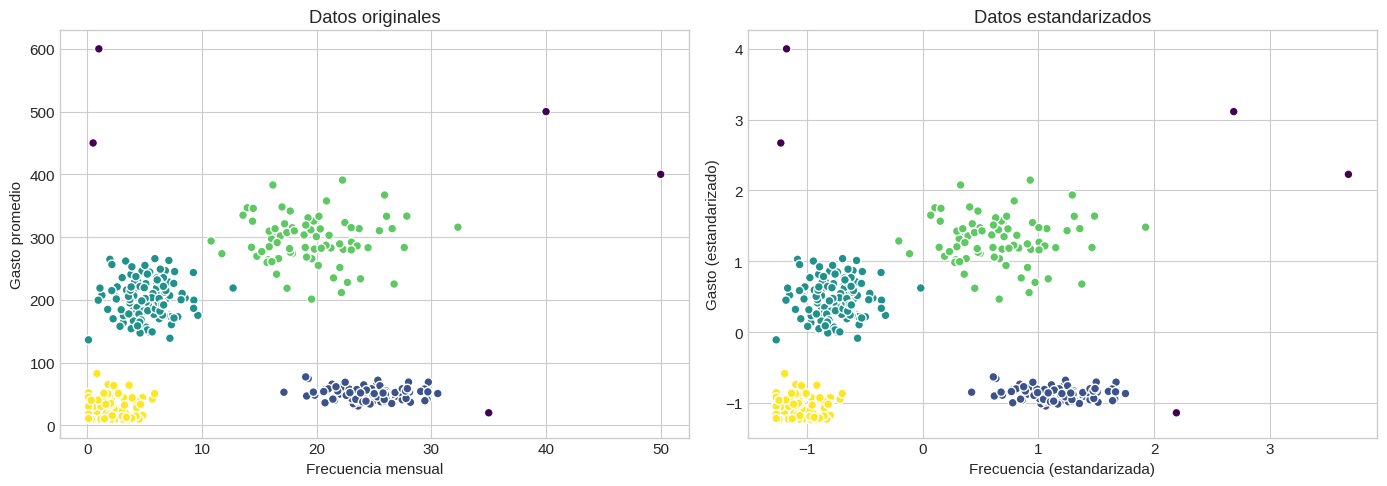

In [ ]:
# TODO: Estandarizar los datos y visualizar

# Su código aquí
scaler = StandardScaler()
X_clientes_sol = scaler.fit_transform(df_clientes[['frecuencia_mensual', 'gasto_promedio']])

# Visualización

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.scatter(df_clientes['frecuencia_mensual'], df_clientes['gasto_promedio'],
           c=df_clientes['segmento_real'], cmap='viridis', edgecolors='w', s=40)
ax.set_xlabel('Frecuencia mensual')
ax.set_ylabel('Gasto promedio')
ax.set_title('Datos originales')

ax = axes[1]
ax.scatter(X_clientes_sol[:, 0], X_clientes_sol[:, 1],
           c=df_clientes['segmento_real'], cmap='viridis', edgecolors='w', s=40)
ax.set_xlabel('Frecuencia (estandarizada)')
ax.set_ylabel('Gasto (estandarizado)')
ax.set_title('Datos estandarizados')

plt.tight_layout()
plt.show()

### Tarea 5.2: Selección de Parámetros para DBSCAN

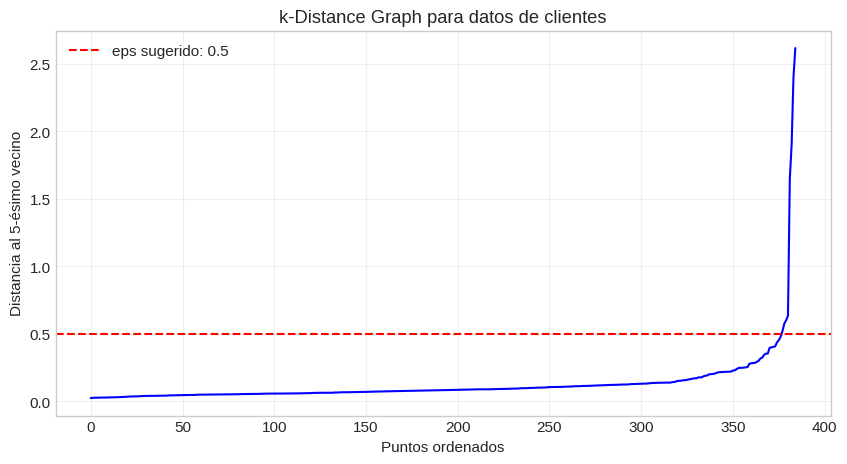

In [ ]:
# TODO: Usar k-distance para determinar eps
k_dist_clientes = calcular_k_distance(X_clientes_sol, 5)

plt.figure(figsize=(10, 5))
plt.plot(range(len(k_dist_clientes)), k_dist_clientes, 'b-', linewidth=1.5)
plt.axhline(y=0.5, color='red', linestyle='--', label='eps sugerido: 0.5')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5-ésimo vecino')
plt.title('k-Distance Graph para datos de clientes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Tarea 5.3: Aplicar y Comparar Algoritmos

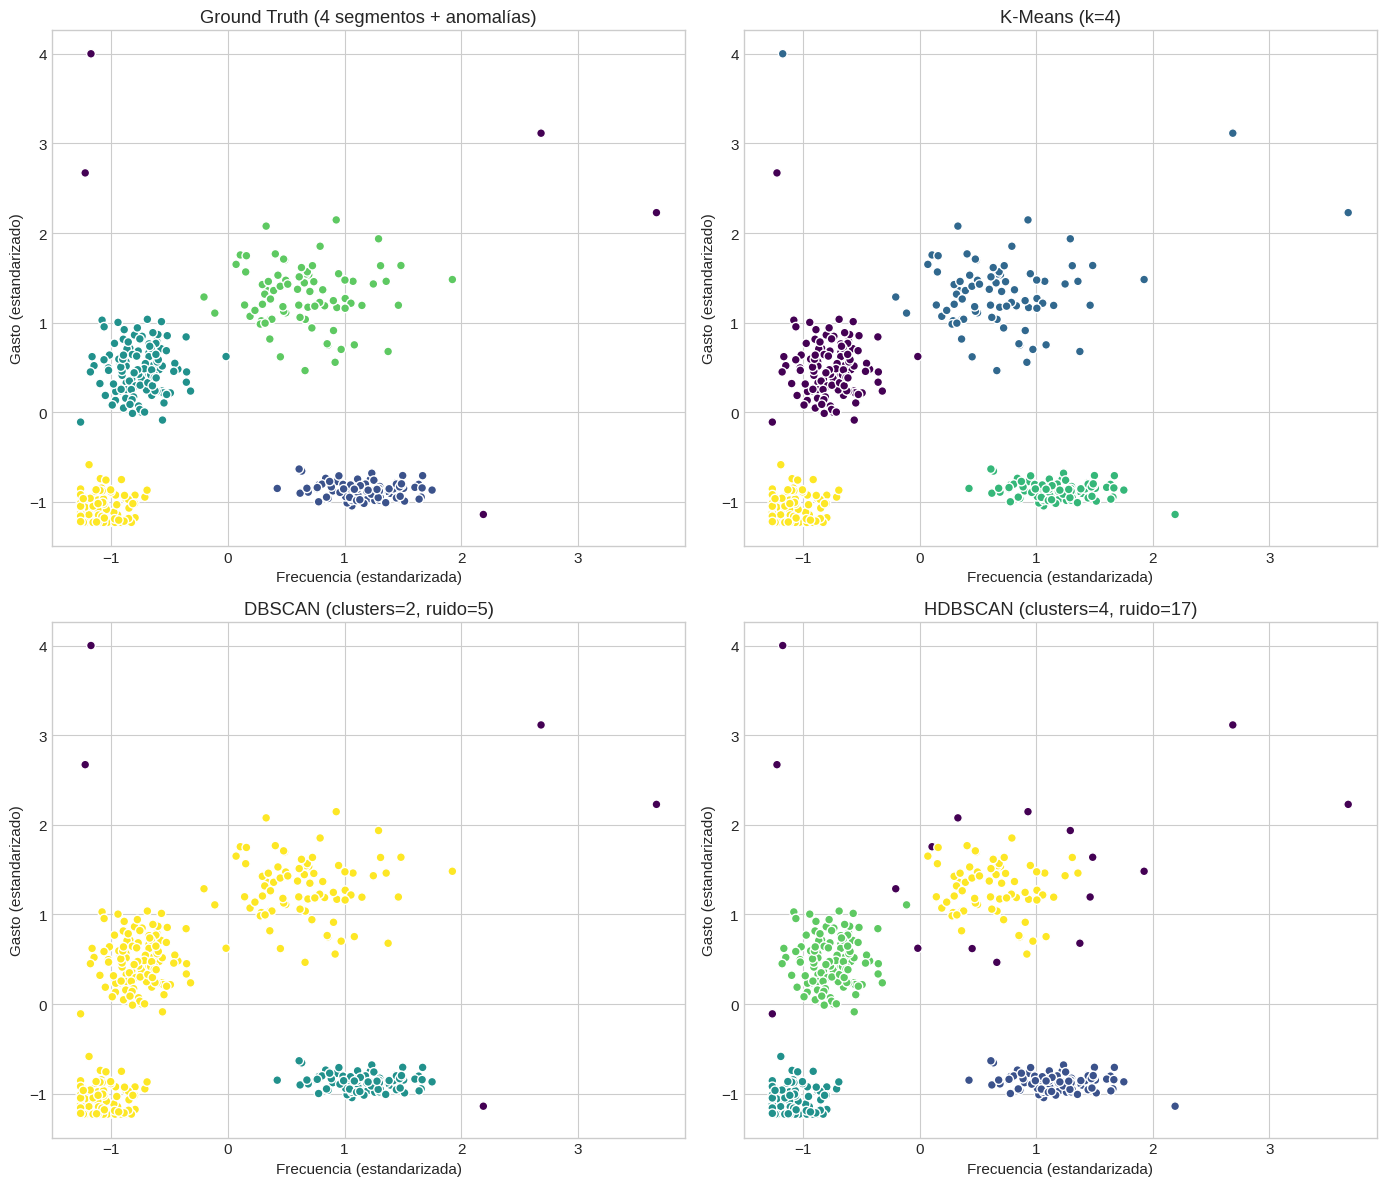

In [ ]:
# TODO: Aplicar K-Means, DBSCAN y HDBSCAN
# Comparar resultados

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Ground Truth
ax = axes[0, 0]
# Su código aquí
y_true_clientes = df_clientes['segmento_real'].values
scatter = ax.scatter(X_clientes_sol[:, 0], X_clientes_sol[:, 1],
                     c=y_true_clientes, cmap='viridis', edgecolors='w', s=40)
ax.set_title('Ground Truth (4 segmentos + anomalías)')
ax.set_xlabel('Frecuencia (estandarizada)')
ax.set_ylabel('Gasto (estandarizado)')

# K-Means
ax = axes[0, 1]
# Su código aquí
kmeans_clientes = KMeans(n_clusters=4, random_state=RANDOM_STATE, n_init=10)
labels_km_clientes = kmeans_clientes.fit_predict(X_clientes_sol)
ax.scatter(X_clientes_sol[:, 0], X_clientes_sol[:, 1],
           c=labels_km_clientes, cmap='viridis', edgecolors='w', s=40)
ax.set_title(f'K-Means (k=4)')
ax.set_xlabel('Frecuencia (estandarizada)')
ax.set_ylabel('Gasto (estandarizado)')


# DBSCAN
ax = axes[1, 0]
# Su código aquí
dbscan_clientes = DBSCAN(eps=0.5, min_samples=5)
labels_db_clientes = dbscan_clientes.fit_predict(X_clientes_sol)
n_clusters_db = len(set(labels_db_clientes)) - (1 if -1 in labels_db_clientes else 0)
n_ruido_db = (labels_db_clientes == -1).sum()
ax.scatter(X_clientes_sol[:, 0], X_clientes_sol[:, 1],
           c=labels_db_clientes, cmap='viridis', edgecolors='w', s=40)
ax.set_title(f'DBSCAN (clusters={n_clusters_db}, ruido={n_ruido_db})')
ax.set_xlabel('Frecuencia (estandarizada)')
ax.set_ylabel('Gasto (estandarizado)')

# HDBSCAN
ax = axes[1, 1]
# Su código aquí
hdbscan_clientes = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
labels_hdb_clientes = hdbscan_clientes.fit_predict(X_clientes_sol)
n_clusters_hdb = len(set(labels_hdb_clientes)) - (1 if -1 in labels_hdb_clientes else 0)
n_ruido_hdb = (labels_hdb_clientes == -1).sum()
ax.scatter(X_clientes_sol[:, 0], X_clientes_sol[:, 1],
           c=labels_hdb_clientes, cmap='viridis', edgecolors='w', s=40)
ax.set_title(f'HDBSCAN (clusters={n_clusters_hdb}, ruido={n_ruido_hdb})')
ax.set_xlabel('Frecuencia (estandarizada)')
ax.set_ylabel('Gasto (estandarizado)')

plt.tight_layout()
plt.show()

### Tarea 5.4: Perfilado de Segmentos

In [ ]:
# TODO: Crear perfiles de los segmentos encontrados por HDBSCAN
# Calcular estadísticas por segmento
df_clientes['cluster_hdbscan'] = labels_hdb_clientes

print("Perfilado de segmentos (HDBSCAN):")
print("=" * 60)

for cluster in sorted(df_clientes['cluster_hdbscan'].unique()):
    mask = df_clientes['cluster_hdbscan'] == cluster
    subset = df_clientes[mask]

    nombre = "Anomalías/Ruido" if cluster == -1 else f"Segmento {cluster}"
    print(f"\n{nombre} (n={len(subset)}):")
    print(f"  Frecuencia mensual: {subset['frecuencia_mensual'].mean():.1f} +/- {subset['frecuencia_mensual'].std():.1f}")
    print(f"  Gasto promedio: ${subset['gasto_promedio'].mean():.0f} +/- ${subset['gasto_promedio'].std():.0f}")

Perfilado de segmentos (HDBSCAN):

Anomalías/Ruido (n=17):
  Frecuencia mensual: 20.3 +/- 13.7
  Gasto promedio: $333 +/- $118

Segmento 0 (n=101):
  Frecuencia mensual: 24.8 +/- 2.9
  Gasto promedio: $50 +/- $10

Segmento 1 (n=80):
  Frecuencia mensual: 2.1 +/- 1.5
  Gasto promedio: $30 +/- $17

Segmento 2 (n=119):
  Frecuencia mensual: 5.2 +/- 1.9
  Gasto promedio: $203 +/- $30

Segmento 3 (n=68):
  Frecuencia mensual: 19.3 +/- 3.1
  Gasto promedio: $294 +/- $32


### Pregunta de Reflexión 5

Analice los resultados de la segmentación:

1. ¿Qué algoritmo identificó mejor los segmentos de clientes? ¿Por qué?
2. ¿Se detectaron correctamente los clientes anómalos? ¿Qué caracteriza a estos clientes?
3. ¿Cómo describiría cada segmento en términos de negocio? ¿Qué estrategias de marketing sugeriría?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 6: Sensibilidad a la Dimensionalidad

### Contexto

Los métodos basados en densidad pueden verse afectados por la alta dimensionalidad. Explore este fenómeno.

### Datos

In [ ]:
# Generar datos en diferentes dimensionalidades
def generar_datos_nd(n_samples, n_features, n_clusters, random_state=42):
    """Genera datos con clusters en n dimensiones."""
    X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                      centers=n_clusters, random_state=random_state)
    return X, y

# Crear datasets de diferentes dimensionalidades
dimensiones = [2, 5, 10, 20, 50]
datasets_dim = {}

for d in dimensiones:
    X, y = generar_datos_nd(n_samples=300, n_features=d, n_clusters=3)
    datasets_dim[d] = (X, y)
    print(f"Dimensión {d}: {X.shape}")

Dimensión 2: (300, 2)
Dimensión 5: (300, 5)
Dimensión 10: (300, 10)
Dimensión 20: (300, 20)
Dimensión 50: (300, 50)


### Tarea 6.1: Analizar Distribución de Distancias

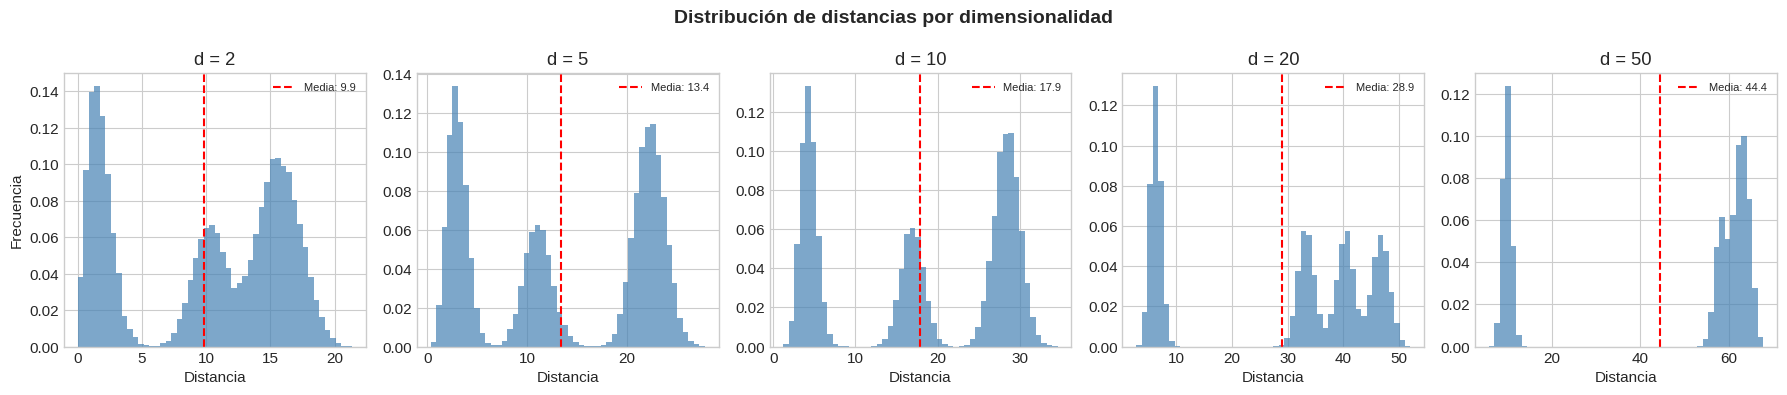

In [ ]:
# TODO: Calcular y visualizar la distribución de distancias en cada dimensión
from scipy.spatial.distance import pdist

fig, axes = plt.subplots(1, len(dimensiones), figsize=(18, 4))

for idx, d in enumerate(dimensiones):
    ax = axes[idx]
    X, _ = datasets_dim[d]

    distancias = pdist(X)
    ax.hist(distancias, bins=50, density=True, alpha=0.7, color='steelblue')
    ax.axvline(x=distancias.mean(), color='red', linestyle='--',
               label=f'Media: {distancias.mean():.1f}')
    ax.set_title(f'd = {d}')
    ax.set_xlabel('Distancia')
    ax.legend(fontsize=8)


    ax.set_title(f'd = {d}')
    ax.set_xlabel('Distancia')

axes[0].set_ylabel('Frecuencia')
plt.suptitle('Distribución de distancias por dimensionalidad', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Tarea 6.2: Rendimiento de DBSCAN vs Dimensionalidad

In [ ]:
# TODO: Aplicar DBSCAN a cada dataset y medir rendimiento
# Use un eps fijo y observe cómo cambia el resultado

resultados_dim = []
eps = 0.5

for d in dimensiones:
    X, y_true = datasets_dim[d]

    # Calcular eps adaptativo basado en distancias
    k_dist = calcular_k_distance(X, 5)
    dbscan_dim = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan_dim.fit_predict(X)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_ruido = (labels == -1).sum()

    mask = labels >= 0
    ari = adjusted_rand_score(y_true[mask], labels[mask]) if mask.sum() > 0 else 0

    resultados_dim.append({
        'Dimensión': d,
        'eps': eps,
        'Clusters': n_clusters,
        'Ruido': n_ruido,
        'ARI': ari
    })

df_resultados = pd.DataFrame(resultados_dim)
print("Rendimiento de DBSCAN vs dimensionalidad:")
print(df_resultados.to_string(index=False))

Rendimiento de DBSCAN vs dimensionalidad:
 Dimensión  eps  Clusters  Ruido     ARI
         2  0.5         5     52 0.94021
         5  0.5         0    300 0.00000
        10  0.5         0    300 0.00000
        20  0.5         0    300 0.00000
        50  0.5         0    300 0.00000


### Pregunta de Reflexión 6

Analice el efecto de la dimensionalidad:

1. ¿Cómo cambia la distribución de distancias al aumentar la dimensionalidad?
2. ¿Por qué DBSCAN tiene problemas en alta dimensionalidad?
3. ¿Qué estrategias podría usar para aplicar clustering basado en densidad a datos de alta dimensionalidad?

*Escriba su respuesta aquí:*

...

In [ ]:
resultados_dim = []

for d in dimensiones:
    X, y_true = datasets_dim[d]

    # Calcular eps adaptativo basado en distancias
    k_dist = calcular_k_distance(X, 5)
    eps_adaptativo = np.percentile(k_dist, 90)  # Percentil 90

    dbscan_dim = DBSCAN(eps=eps_adaptativo, min_samples=5)
    labels = dbscan_dim.fit_predict(X)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_ruido = (labels == -1).sum()

    mask = labels >= 0
    ari = adjusted_rand_score(y_true[mask], labels[mask]) if mask.sum() > 0 else 0

    resultados_dim.append({
        'Dimensión': d,
        'eps': eps_adaptativo,
        'Clusters': n_clusters,
        'Ruido': n_ruido,
        'ARI': ari
    })

df_resultados = pd.DataFrame(resultados_dim)
print("Rendimiento de DBSCAN Adaptativo vs dimensionalidad:")
print(df_resultados.to_string(index=False))

Rendimiento de DBSCAN Adaptativo vs dimensionalidad:
 Dimensión      eps  Clusters  Ruido  ARI
         2 0.829125         3     10  1.0
         5 2.128886         3      6  1.0
        10 3.435620         3      5  1.0
        20 5.352840         3      5  1.0
        50 9.128368         3      4  1.0


---

## Referencias

- Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. *KDD*, 96(34), 226-231.
- Campello, R. J., Moulavi, D., & Sander, J. (2013). Density-based clustering based on hierarchical density estimates. *PAKDD*, 160-172.
- Scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html
- HDBSCAN documentation: https://hdbscan.readthedocs.io/

---


#EOF (End Of File)